In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv("C:\\Users\\mutia\\data_B.csv")


In [20]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,37969,15780804,Ugorji,850.0,France,Male,42.0,5,0.00,2,1,1,105560.01,0
1,1,121427,15593974,Dickson,597.0,Germany,Male,46.0,9,112291.06,2,1,1,47410.06,0
2,2,151801,15655274,Teng,637.0,Germany,Male,35.0,3,145974.79,2,1,0,180934.67,0
3,3,149981,15645404,McWilliams,695.0,France,Male,39.0,8,0.00,1,1,0,162669.73,0
4,4,115198,15625881,Yobachi,695.0,France,Female,29.0,0,109109.89,1,1,0,120770.80,0


Saya akan mengencoding Geography, Gender. 
Kemungkinan saya akan menghapus kolom Unamed: 0 karena tidak relevant 
Saya juga akan menghapus colom id dan CustomerID

In [9]:
df.shape

(41259, 15)

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [31]:
df['Surname'].value_counts()

Hsia      608
T'ien     585
Hs?       399
Kao       392
P'eng     380
         ... 
Levien      1
Dowse       1
Moen        1
Avent       1
Stehle      1
Name: Surname, Length: 2299, dtype: int64

Saya memutuskan untuk menghapus kolom ini karena nama tidak berpengaruh terhadap churn

In [13]:
df['Unnamed: 0'].value_counts()

0        1
27479    1
27501    1
27502    1
27503    1
        ..
13754    1
13755    1
13756    1
13757    1
41258    1
Name: Unnamed: 0, Length: 41259, dtype: int64

dari sini terlihat bahwa variable ini tidak dibutuhkan. Maka saya akan menghapusnya

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [21]:
df.isnull().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Terdapat Missing value pada CreditScore

cek apakah ada outlier pada Credit Score

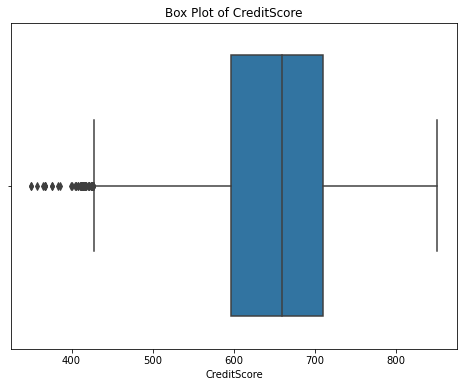

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CreditScore'])
plt.title('Box Plot of CreditScore')
plt.show()

Terdapat outlier pada data, maka saya akan melakukan imputasi menggunakan median

In [46]:
df2=df.copy()

In [47]:
df2f=df2.drop(columns=['Unnamed: 0'], inplace=True)
df2f=df2.drop(columns=['Surname'], inplace=True)
df2f=df2.drop(columns=['id'], inplace=True)
df2f=df2.drop(columns=['CustomerId'], inplace=True)

In [48]:
#periksa apakah kolom Unnamed: 0 sudah terhapus atau belum
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [119]:
input_df=df2.drop('churn',axis=1)
output_df=df2['churn']

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [121]:
credit_score_median = x_train['CreditScore'].median()
x_train['CreditScore'].fillna(credit_score_median, inplace=True)

credit_score_median2 = x_test['CreditScore'].median()
x_test['CreditScore'].fillna(credit_score_median2, inplace=True)

# Cek apakah masih ada missing value
missing_values = x_train.isnull().sum()
print("Missing values in x_train after imputation:\n", missing_values)
missing_values2 = x_test.isnull().sum()
print("Missing values in x_test after imputation:\n", missing_values2)

Missing values in x_train after imputation:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
Missing values in x_test after imputation:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [122]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33007 entries, 23629 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33007 non-null  float64
 1   Geography        33007 non-null  object 
 2   Gender           33007 non-null  object 
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  int64  
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  int64  
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


In [76]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8252 entries, 37555 to 28662
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8252 non-null   float64
 1   Geography        8252 non-null   object 
 2   Gender           8252 non-null   object 
 3   Age              8252 non-null   float64
 4   Tenure           8252 non-null   int64  
 5   Balance          8252 non-null   float64
 6   NumOfProducts    8252 non-null   int64  
 7   HasCrCard        8252 non-null   int64  
 8   IsActiveMember   8252 non-null   int64  
 9   EstimatedSalary  8252 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 709.2+ KB


Encoding categorical variable

In [64]:
x_train['Geography'].value_counts()

France     18909
Spain       7167
Germany     6931
Name: Geography, dtype: int64

In [66]:
x_train['Gender'].value_counts()

Male      18688
Female    14319
Name: Gender, dtype: int64

In [99]:
print(x_train.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [106]:
one_hot_train = pd.get_dummies(x_train, columns=['Geography','Gender'])
print(one_hot_train)


       CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
23629        646.0  40.0       8  171740.69              1          1   
6996         676.0  21.0      10   79340.95              1          0   
26510        710.0  53.0       8       0.00              1          0   
40020        613.0  45.0       7  104796.54              2          1   
17668        589.0  63.0       3       0.00              2          1   
...            ...   ...     ...        ...            ...        ...   
6265         676.0  40.0       8       0.00              2          1   
11284        661.0  34.0       8       0.00              2          1   
38158        521.0  47.0       7       0.00              3          0   
860          714.0  67.0       2       0.00              1          0   
15795        574.0  29.0      10  115545.33              2          1   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
23629               0        121592.50      

In [109]:
one_hot_test = pd.get_dummies(x_test, columns=['Geography','Gender'])
print(one_hot_test)


       CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
37555        533.0  52.0       8  127545.56              2          0   
4280         563.0  47.0       5  166526.26              2          0   
36838        707.0  31.0       5  133686.46              2          1   
39035        754.0  29.0       7       0.00              2          1   
22201        586.0  33.0       1       0.00              2          1   
...            ...   ...     ...        ...            ...        ...   
3493         588.0  34.0       2  103929.43              1          1   
29445        578.0  30.0       4       0.00              2          1   
23582        600.0  43.0       9  110783.28              1          1   
4036         625.0  51.0       2   79468.96              1          1   
28662        635.0  64.0       4  120165.30              1          0   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
37555               0         79559.02      

In [107]:
one_hot_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33007 entries, 23629 to 15795
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        33007 non-null  float64
 1   Age                33007 non-null  float64
 2   Tenure             33007 non-null  int64  
 3   Balance            33007 non-null  float64
 4   NumOfProducts      33007 non-null  int64  
 5   HasCrCard          33007 non-null  int64  
 6   IsActiveMember     33007 non-null  int64  
 7   EstimatedSalary    33007 non-null  float64
 8   Geography_France   33007 non-null  uint8  
 9   Geography_Germany  33007 non-null  uint8  
 10  Geography_Spain    33007 non-null  uint8  
 11  Gender_Female      33007 non-null  uint8  
 12  Gender_Male        33007 non-null  uint8  
dtypes: float64(4), int64(4), uint8(5)
memory usage: 2.4 MB


In [108]:
one_hot_train.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [110]:
one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8252 entries, 37555 to 28662
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8252 non-null   float64
 1   Age                8252 non-null   float64
 2   Tenure             8252 non-null   int64  
 3   Balance            8252 non-null   float64
 4   NumOfProducts      8252 non-null   int64  
 5   HasCrCard          8252 non-null   int64  
 6   IsActiveMember     8252 non-null   int64  
 7   EstimatedSalary    8252 non-null   float64
 8   Geography_France   8252 non-null   uint8  
 9   Geography_Germany  8252 non-null   uint8  
 10  Geography_Spain    8252 non-null   uint8  
 11  Gender_Female      8252 non-null   uint8  
 12  Gender_Male        8252 non-null   uint8  
dtypes: float64(4), int64(4), uint8(5)
memory usage: 620.5 KB


In [111]:
one_hot_train.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

RANDOM FOREST

In [113]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(one_hot_train, y_train)


RandomForestClassifier(max_depth=4)

In [114]:
y_predict=RF_class.predict(one_hot_test)

In [115]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6486
           1       0.84      0.30      0.44      1766

    accuracy                           0.84      8252
   macro avg       0.84      0.64      0.67      8252
weighted avg       0.84      0.84      0.80      8252



Xgboost

In [136]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model = xgb.XGBClassifier()

model.fit(one_hot_train, y_train)
y_pred = model.predict(one_hot_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.859428017450315


In [137]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6486
           1       0.72      0.55      0.63      1766

    accuracy                           0.86      8252
   macro avg       0.81      0.75      0.77      8252
weighted avg       0.85      0.86      0.85      8252



dari hasil ini, saya memutuskan untuk menggunakan Xgboost

In [138]:
import pickle as pkl
filename = 'Xgboost_class.pkl'
pkl.dump(model, open(filename, 'wb'))

In [139]:
import pickle as pkl

filename = 'Xgboost_class.pkl'
with open(filename, 'rb') as file:
    loaded_model = pkl.load(file)

print(loaded_model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
